# 相似度+svd分解

## 课件中案例

[(0, 2, 0.99), (0, 4, 0.89), (0, 5, 0.85), (0, 1, 0.73), (0, 3, 0.3)]
[(1, 4, 0.89), (1, 5, 0.89), (1, 0, 0.73), (1, 2, 0.65), (1, 3, 0.65)]
[(2, 0, 0.99), (2, 4, 0.87), (2, 5, 0.83), (2, 1, 0.65), (2, 3, 0.26)]
[(3, 5, 0.72), (3, 4, 0.66), (3, 1, 0.65), (3, 0, 0.3), (3, 2, 0.26)]
[(4, 5, 1.0), (4, 0, 0.89), (4, 1, 0.89), (4, 2, 0.87), (4, 3, 0.66)]
[(5, 4, 1.0), (5, 1, 0.89), (5, 0, 0.85), (5, 2, 0.83), (5, 3, 0.72)]


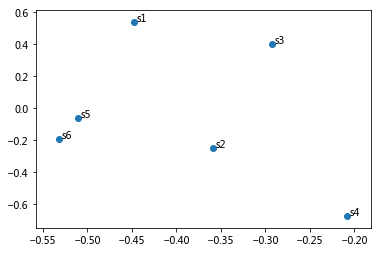

In [77]:
#1.计算相似度
import numpy as np
R=np.array([[5,5,0,5],[5,0,3,4],[3,4,0,3],[0,0,5,3],[5,4,4,5],[5,4,5,5]])

def cos_dis(a,b):
    return np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))

for i in range(R.shape[0]):
    a=[]
    for j in range(R.shape[0]):
        if i!=j:
            a.append((i,j,np.round(cos_dis(R[i],R[j]),2)))
    c=sorted(a,key=lambda x:x[2],reverse=True)
    print(c)
    
#2.降维处理（svd）
import numpy as np
R=np.array([[5,5,0,5],[5,0,3,4],[3,4,0,3],[0,0,5,3],[5,4,4,5],[5,4,5,5]])

def cos_dis(a,b):
    return np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))
    
def sigma_k(sigma,percentage):
    sigma2=0
    k=0
    for i in sigma:
        sigma2+=i**2
        k+=1
        if sigma2/sum(sigma**2)>percentage:
            return k
        
import matplotlib.pyplot as plt
x=u_new[:,0]
y=u_new[:,1]
plt.rcParams['font.sans-serif']=['Microsoft YaHei']          
plt.scatter(x,y)

txt = ['s1','s2','s3','s4','s5','s6']
for i in range(len(x)):
    plt.annotate(txt[i],xy=(x[i]+0.003,y[i]+0.003))

## 电影评分预测

In [12]:
import pandas as pd
import numpy as np
data1=pd.read_excel('C:\\Users\\Administrator\\Desktop\\remmand.xlsx')
data=data1.values
data=data.T

def f(data,item,user):
    sim_total=0
    sim_=0
    for j in range(data.shape[0]):
        if j!=item:
            sim=cos_dis(data[item],data[j])
            sim_total+=sim
            sim_+=sim*data[j,user]
    return sim_/sim_total

def cos_dis(a,b):
    return np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))
   
def recommand(data,user):
    item_scores=[]
    for item in range(data.shape[0]):
        if data[item,user]==0:
            data[item,user]=f(data,item,user)
            item_scores.append((item,data[item,user]))
    item_scores=sorted(item_scores,key=lambda x:x[1],reverse=True)
    return item_scores[:3]

In [13]:
recommand(data,user=2)

[(12, 3.31371143682255), (6, 2.9248858897184724), (1, 2.7973671324650384)]

In [82]:
data

array([[5.        , 2.06851416, 5.        , 3.        , 4.        ,
        0.        , 4.        , 0.        ],
       [3.        , 2.89765383, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [4.5       , 3.        , 0.        , 0.        , 4.5       ,
        5.        , 5.        , 0.        ],
       [5.        , 2.52673272, 5.        , 0.        , 5.        ,
        4.        , 0.        , 0.        ],
       [3.        , 5.        , 3.        , 4.        , 2.        ,
        3.        , 1.        , 4.5       ],
       [4.5       , 5.        , 4.5       , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [5.        , 3.        , 0.        , 3.5       , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 4.        , 2.        , 5.        , 2.        ,
        0.        , 0.        , 4.        ],
       [0.        , 3.        , 0.        , 4.5       , 0.        ,
        3.5       , 0.      

降维后推荐

In [11]:
def sigma_k(sigma,percentage):
    sigma2=0
    k=0
    for i in sigma:
        sigma2+=i**2
        k+=1
        if sigma2/sum(sigma**2)>=percentage:
            return k
        
def svd(data,item,user,percentage):
    u,sigma,v=np.linalg.svd(data)
    k=sigma_k(sigma,percentage)
    u=u[:,:k]
    sim_=0
    sim_total=0
    for j in range(data.shape[0]):
        if j!=item:
            sim=cos_dis(u[j],u[item])
            sim_+=sim*data[j,user]
            sim_total+=sim
    return sim_/sim_total


def reco(data,user,percentage=1):
    item_sores=[]
    for item in range(data.shape[0]):   
        if data[item,user]==0:
            data[item,user]=svd(data,item,user,percentage)
            item_sores.append((item,data[item,user])) 
    item_sores=sorted(item_sores,key=lambda x:x[1],reverse=True)
    return item_sores[:3] 
reco(data,user=2)

[(10, 0.5040138771565142), (6, 0.1956748277728743), (2, 0.11880180432451662)]